In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
udemy = pd.read_csv('udemy_courses.csv')
udemy.sample(4)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2224,931152,Instant Bodhran - part two; learning further d...,https://www.udemy.com/instant-bodhran-part-two...,True,40,28,1,10,Beginner Level,1.0,2016-08-18T22:04:40Z,Musical Instruments
2337,854692,Instant Harmonica - play Over the Rainbow + Sk...,https://www.udemy.com/instant-harmonica-play-o...,True,40,29,4,22,All Levels,1.5,2016-07-18T21:54:18Z,Musical Instruments
1881,326428,Learn Piano Scales: Play any song in any key! ...,https://www.udemy.com/learn-piano-scales/,True,50,1720,9,26,Beginner Level,2.5,2014-10-29T09:56:10Z,Musical Instruments
2599,98140,Introduction to Bootstrap 3,https://www.udemy.com/introduction-to-bootstra...,True,20,5795,79,29,Beginner Level,2.5,2013-09-27T03:11:22Z,Web Development


In [3]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [4]:
udemy.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [7]:
cursos = udemy.sort_values('num_subscribers',ascending=False) 
# Primero extraemos el precio del certificado para analizarlo con respecto a los alumnos matriculados
cursos_top_10=cursos.head(10)
cursos_top_10

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14T07:03:41Z,Web Development
3032,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.5,2013-06-09T15:51:55Z,Web Development
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02T21:13:27Z,Web Development
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08T16:21:30Z,Web Development
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08T22:28:36Z,Web Development
1896,19421,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,False,0,101154,1042,95,Beginner Level,4.5,2012-06-15T17:00:33Z,Musical Instruments
2589,473160,Web Design for Web Developers: Build Beautiful...,https://www.udemy.com/web-design-secrets/,False,0,98867,6512,20,All Levels,3.0,2015-04-13T18:29:47Z,Web Development
2619,94430,Learn Javascript & JQuery From Scratch,https://www.udemy.com/learn-javascript-jquery-...,True,30,84897,2685,10,All Levels,2.0,2013-10-10T15:19:29Z,Web Development
3289,130064,Practical PHP: Master the Basics and Code Dyna...,https://www.udemy.com/code-dynamic-websites/,False,0,83737,4598,45,All Levels,6.5,2014-07-19T03:02:05Z,Web Development
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12T23:19:54Z,Web Development


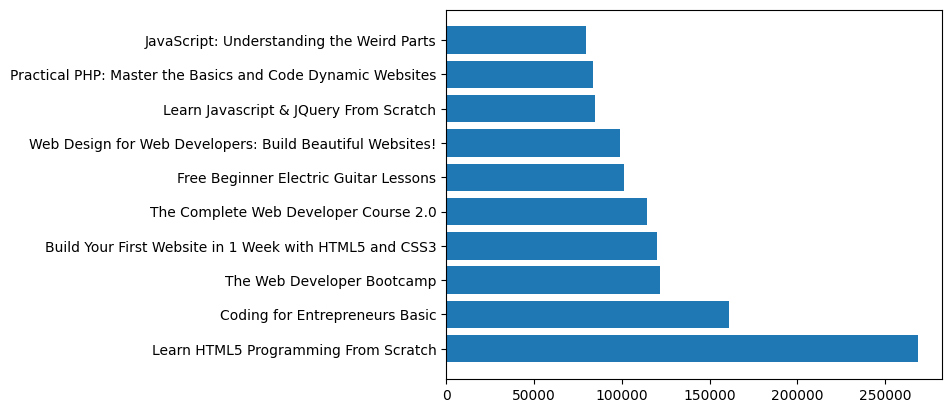

In [8]:
plt.barh(cursos_top_10['course_title'],cursos_top_10['num_subscribers'])
plt.show()

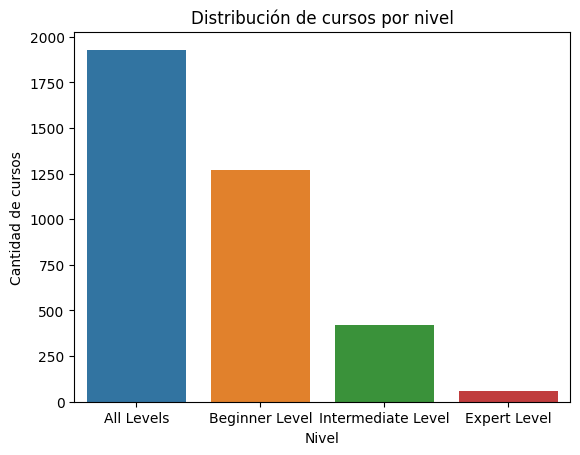

In [9]:
sns.countplot(data=cursos, x='level', order=cursos['level'].value_counts().index)
plt.xlabel('Nivel')
plt.ylabel('Cantidad de cursos')
plt.title('Distribución de cursos por nivel')
plt.show()

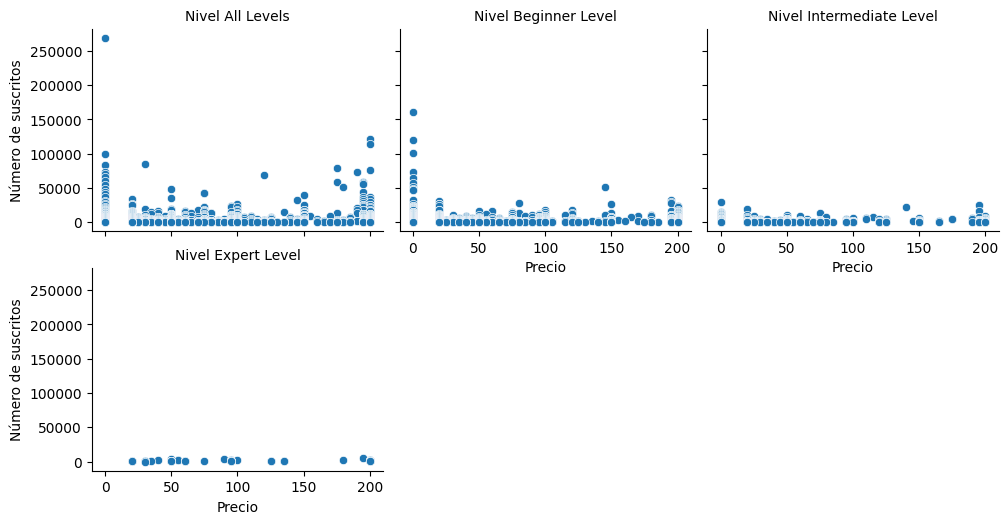

In [11]:
g = sns.FacetGrid(data=cursos, col='level', col_wrap=3, height=4)

g.map(sns.scatterplot, 'price', 'num_subscribers')

g.set_axis_labels('Precio', 'Número de suscritos')
g.set_titles('Nivel {col_name}')

g.fig.set_figheight(5)
g.fig.set_figwidth(10)

plt.show()

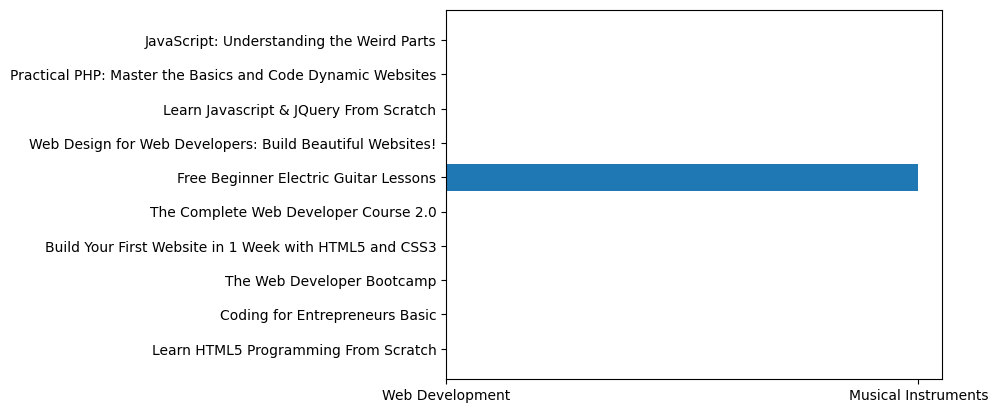

In [14]:
plt.barh(cursos_top_10['course_title'],cursos_top_10['subject'])
plt.show()